In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# <i>CSV IMPORT</i>

In [20]:
df_list = []

for i in range(1, 19):
    file_path = f"../../datasets/eda_dataset/urls_{i}.csv"
    try:
        df = pd.read_csv(file_path)
        df_list.append(df)
        print(f"Loaded: urls_{i}.csv")
    except FileNotFoundError:
        print(f"File not found: urls_{i}.csv")

cf1 = pd.concat(df_list, ignore_index=True)
print(f"\nCombined DataFrame 1 shape: {cf1.shape}")

Loaded: urls_1.csv
Loaded: urls_2.csv
Loaded: urls_3.csv
Loaded: urls_4.csv
Loaded: urls_5.csv
Loaded: urls_6.csv
Loaded: urls_7.csv
Loaded: urls_8.csv
Loaded: urls_9.csv
Loaded: urls_10.csv
Loaded: urls_11.csv
Loaded: urls_12.csv
Loaded: urls_13.csv
Loaded: urls_14.csv
Loaded: urls_15.csv
Loaded: urls_16.csv
Loaded: urls_17.csv
Loaded: urls_18.csv

Combined DataFrame 1 shape: (1800000, 40)


In [5]:
cf1.columns

Index(['url', 'label', 'dots', 'at', 'equals', 'slashes', 'hyphens', 'colons',
       'question_marks', 'digits', 'and', 'underscore', 'tilde', 'percent',
       'lowercase', 'uppercase', 'upper_to_lower_ratio', 'is_https',
       'url_length', 'domain_length', 'path_length', 'path_depth',
       'query_length', 'query_count', 'fragment_length', 'se_url', 'se_domain',
       'se_path', 'se_query', 'se_fragment', 'cte_domain', 'is_domain_ip',
       'tld', 'is_tld_iana_reg', 'is_mtld', 'subdomains', 'special_chars',
       'digit_to_length_ratio', 'char_to_length_ratio',
       'specialchar_to_length_ratio'],
      dtype='object')

# <i>VISUALISATION</i>

In [23]:
def line_plot(column_name):
    fig, axes = plt.subplots(1, 1, figsize=(18, 5), sharey=True)

    axes.plot(cf1.sort_values(column_name)[column_name].reset_index(drop=True))
    axes.set_title("Non-Malicious")
    axes.set_xlabel("Index")
    axes.set_ylabel(f"{column_name} Count")
    axes.set_ylim(0, 100)
    
    plt.tight_layout()
    plt.suptitle(f"{column_name.upper()}", fontsize=16, y=1.05)
    plt.show()

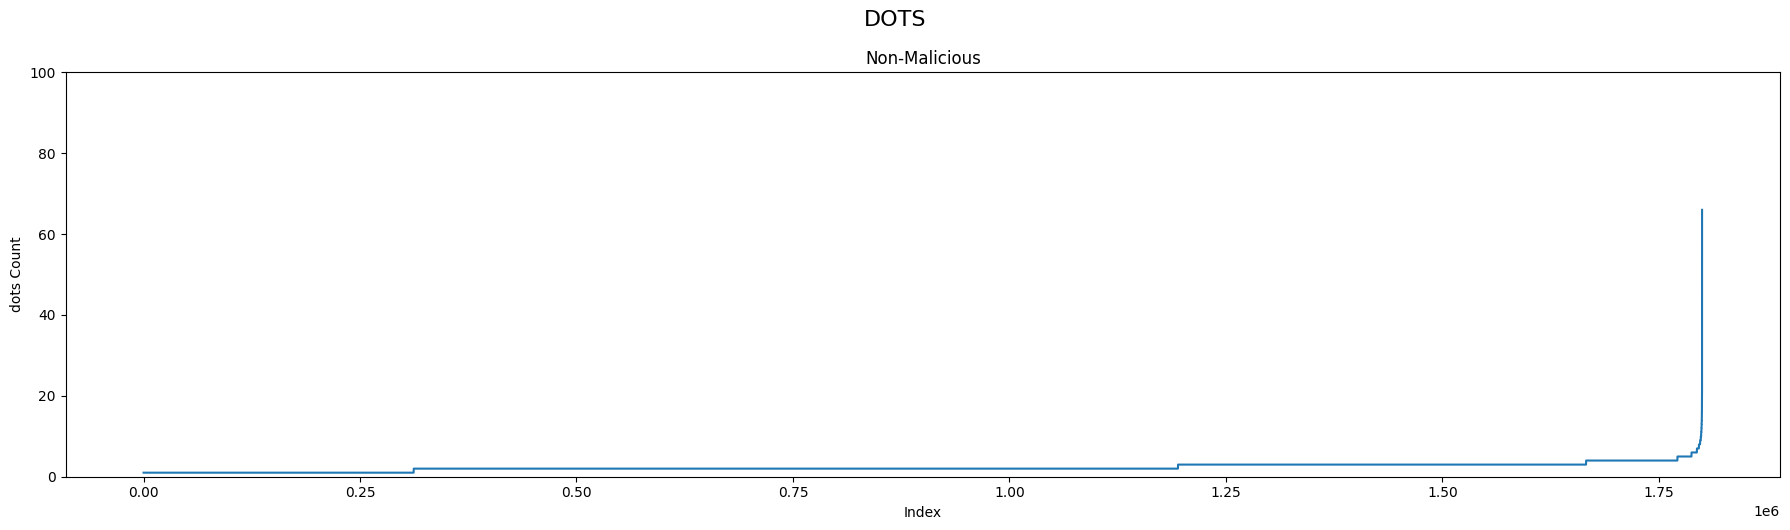

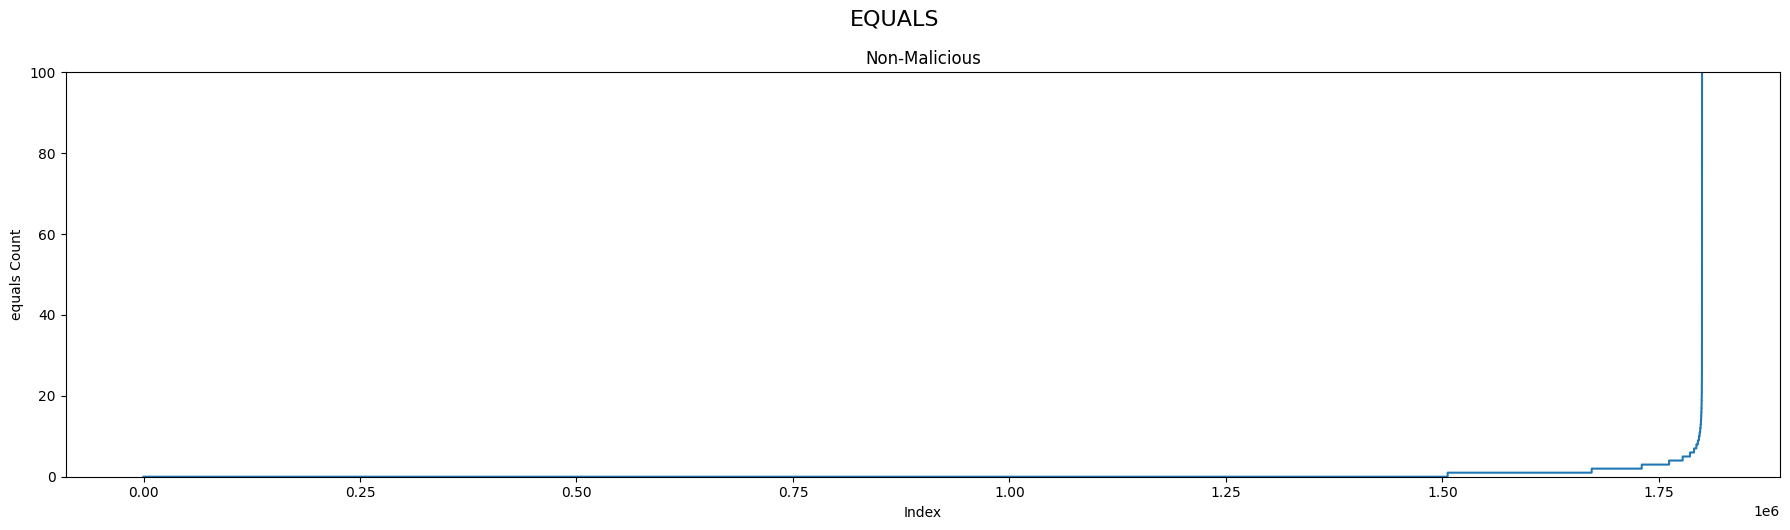

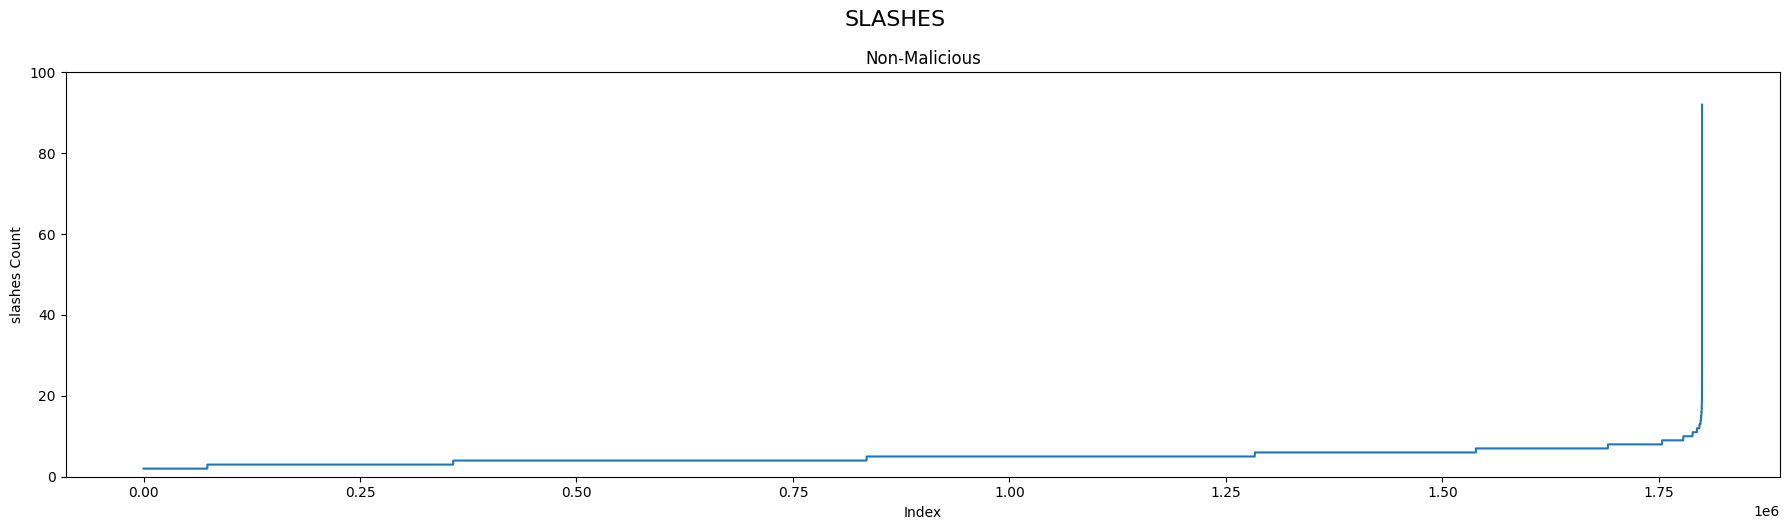

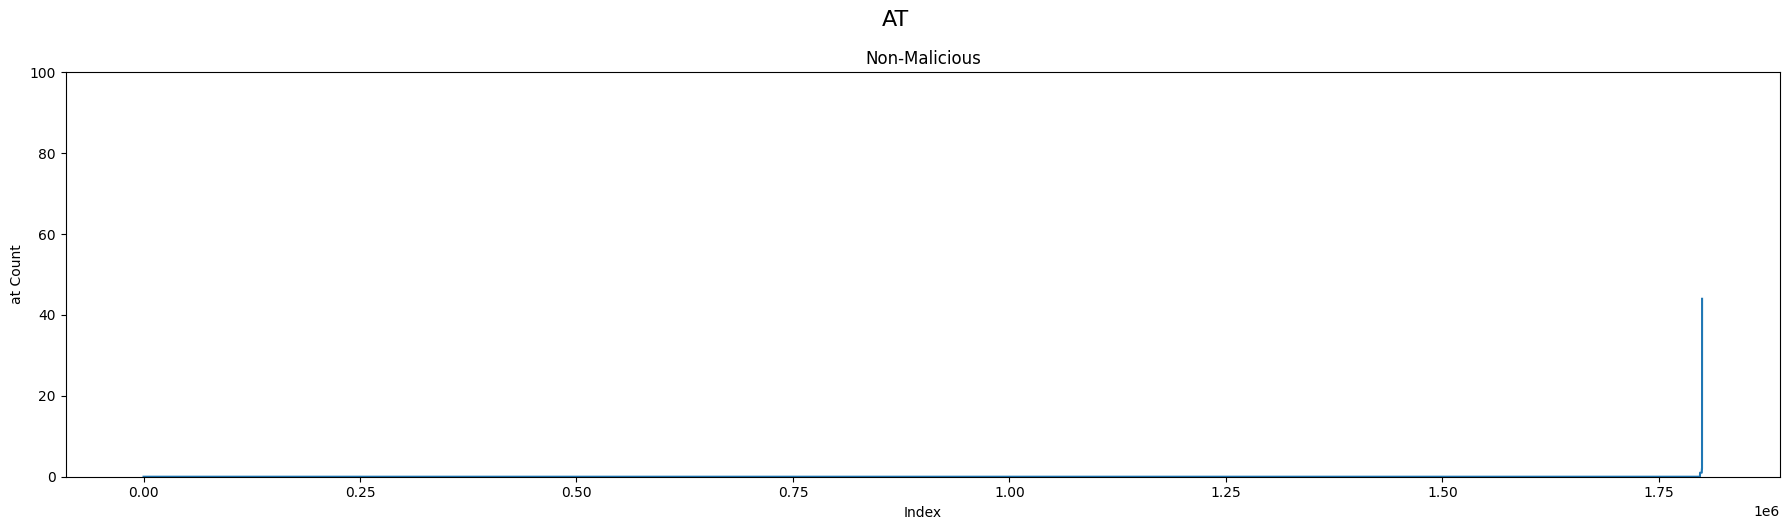

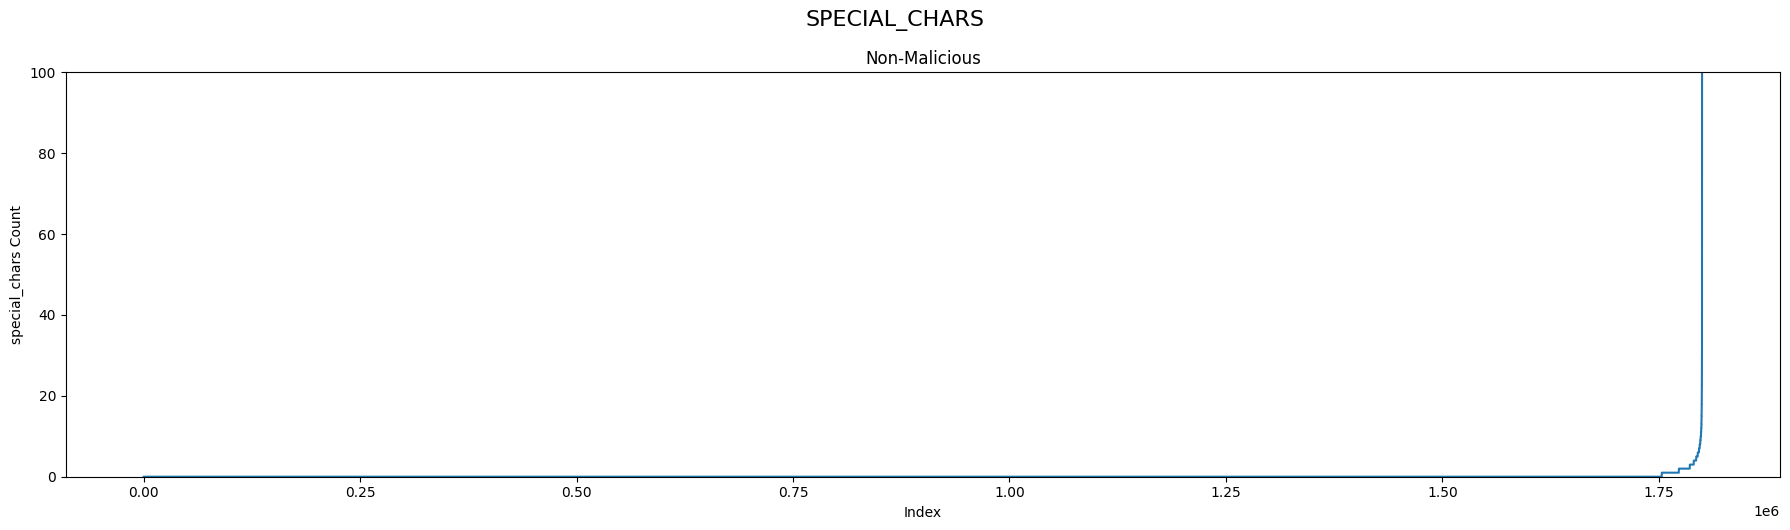

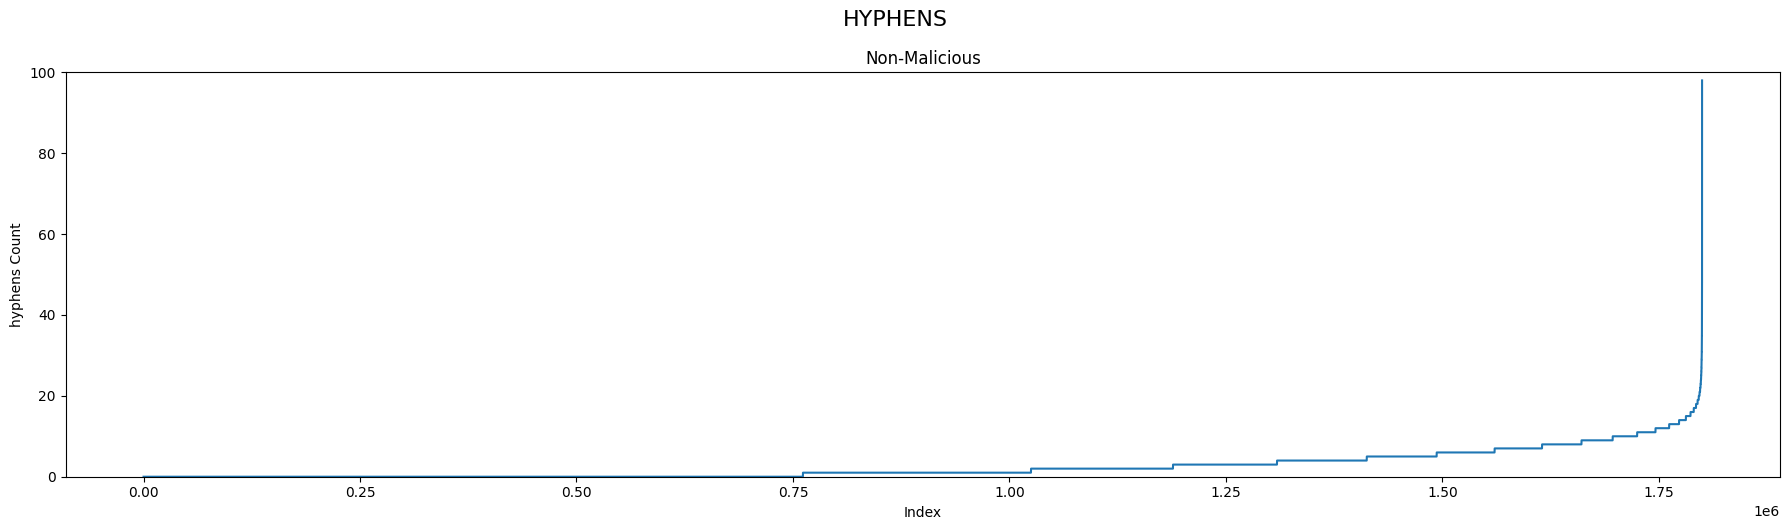

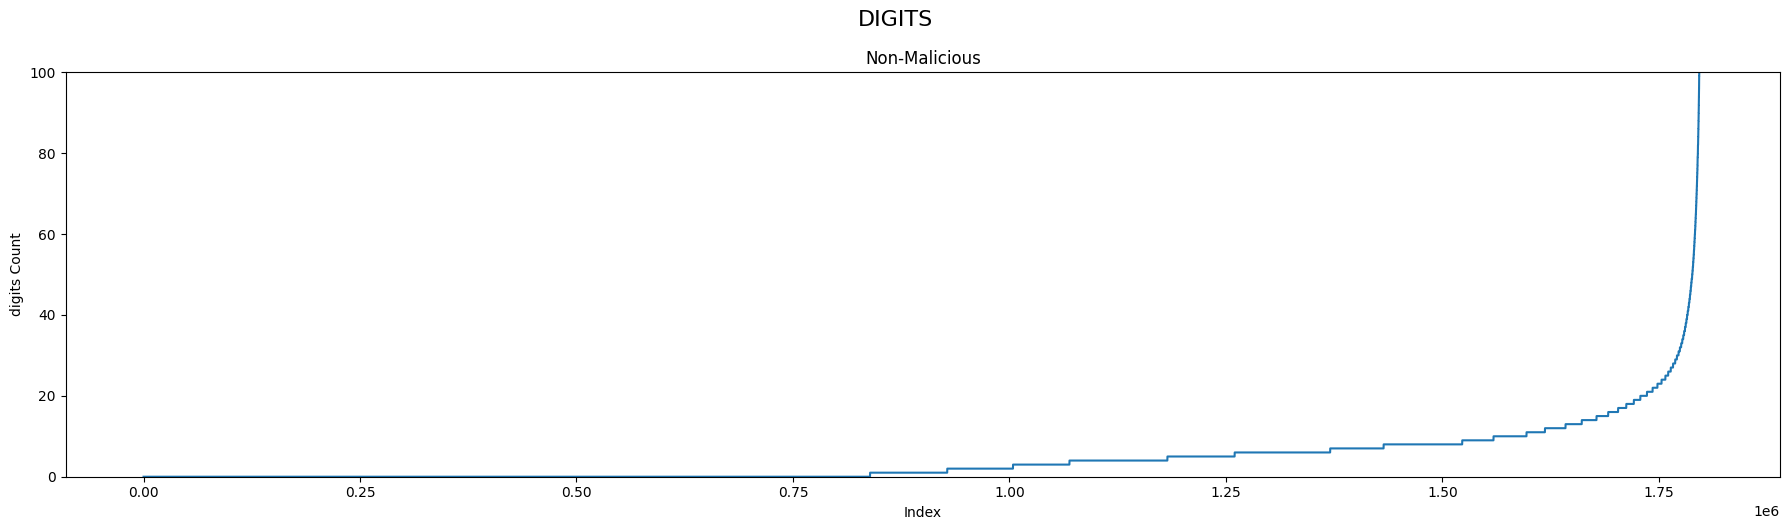

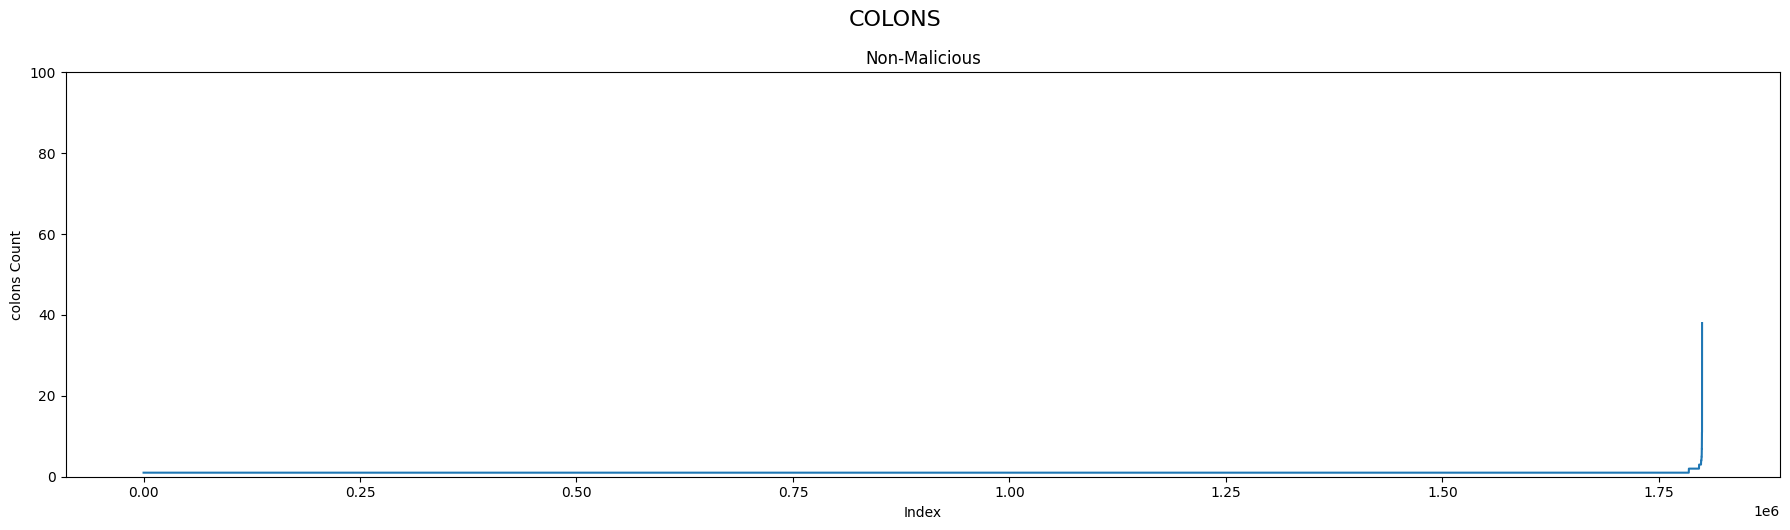

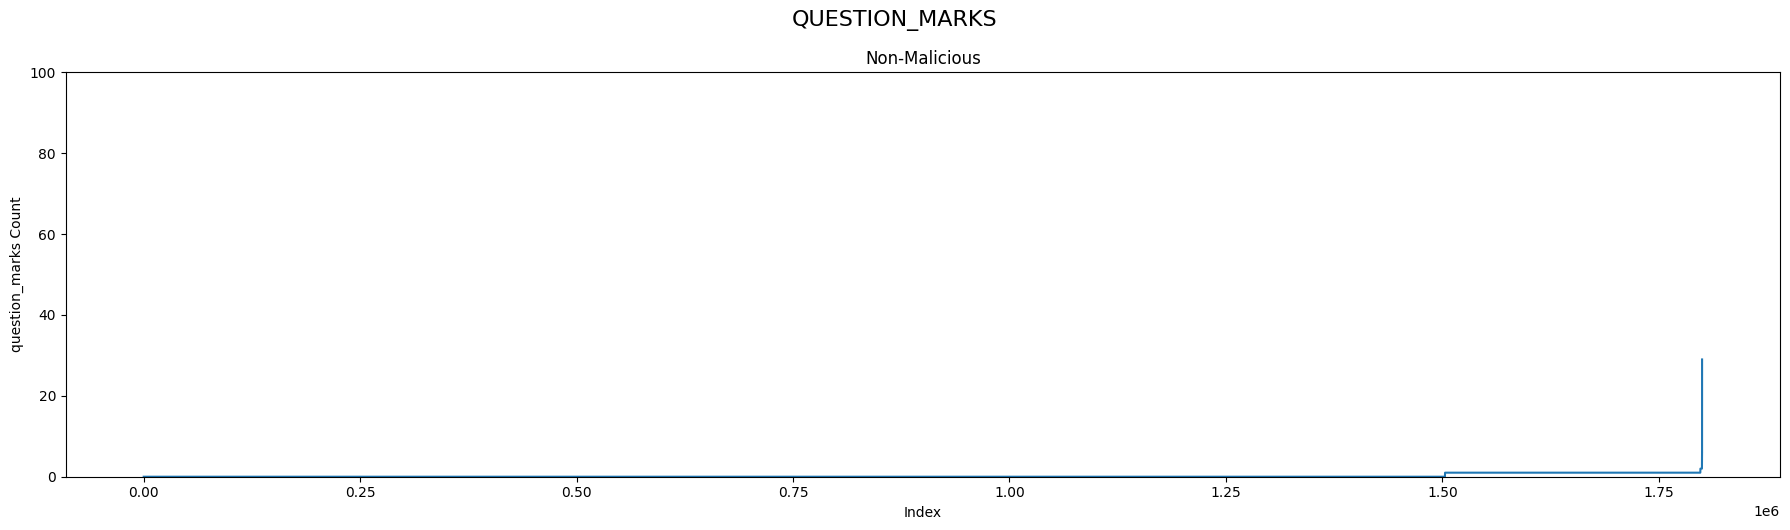

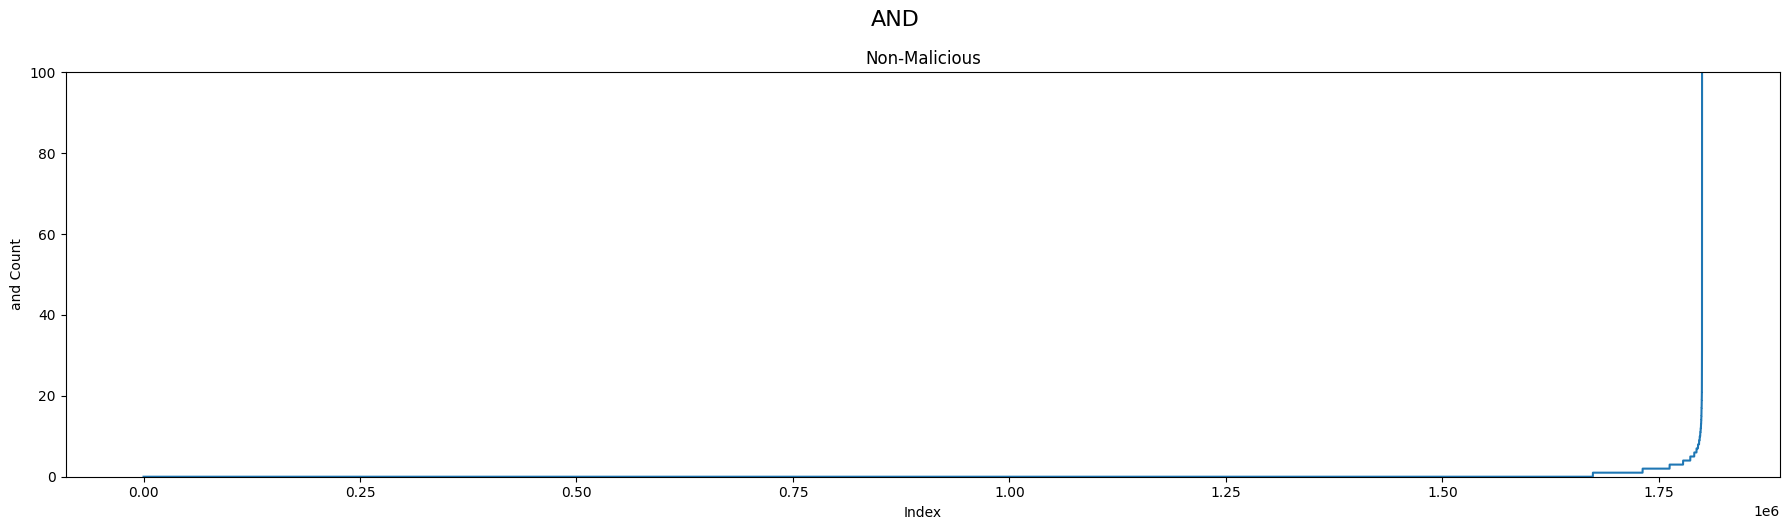

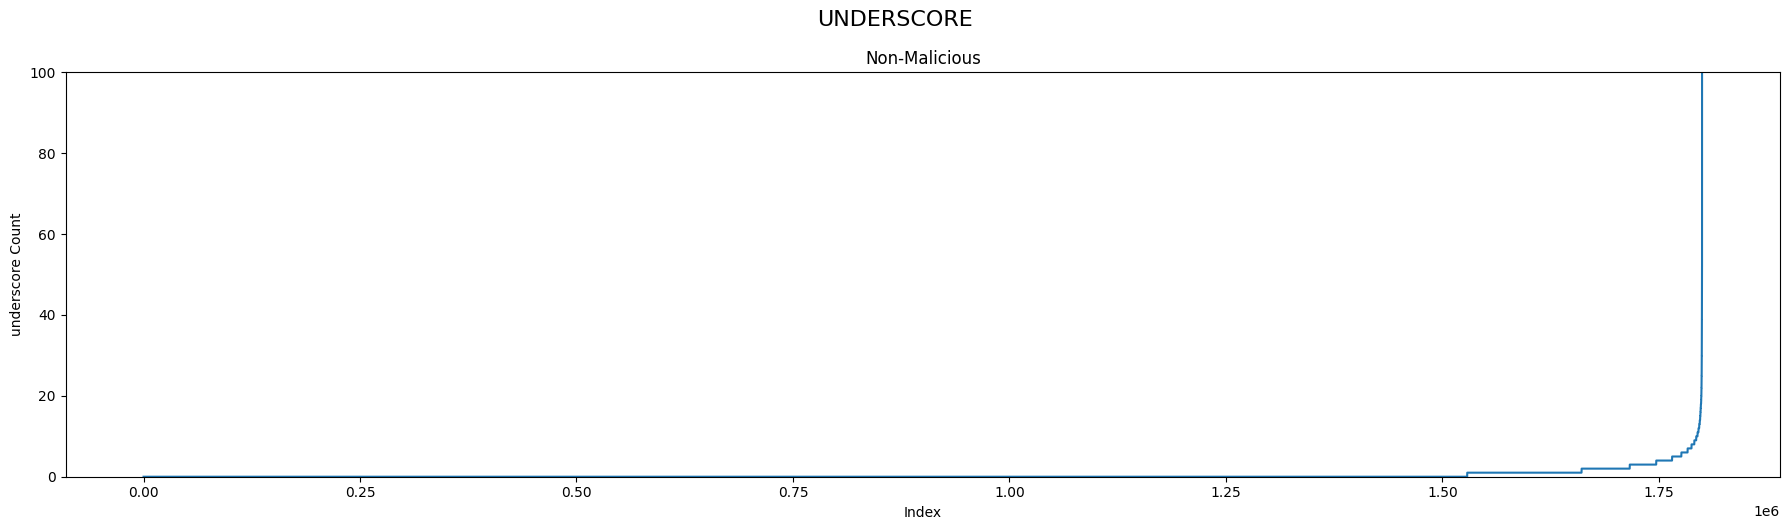

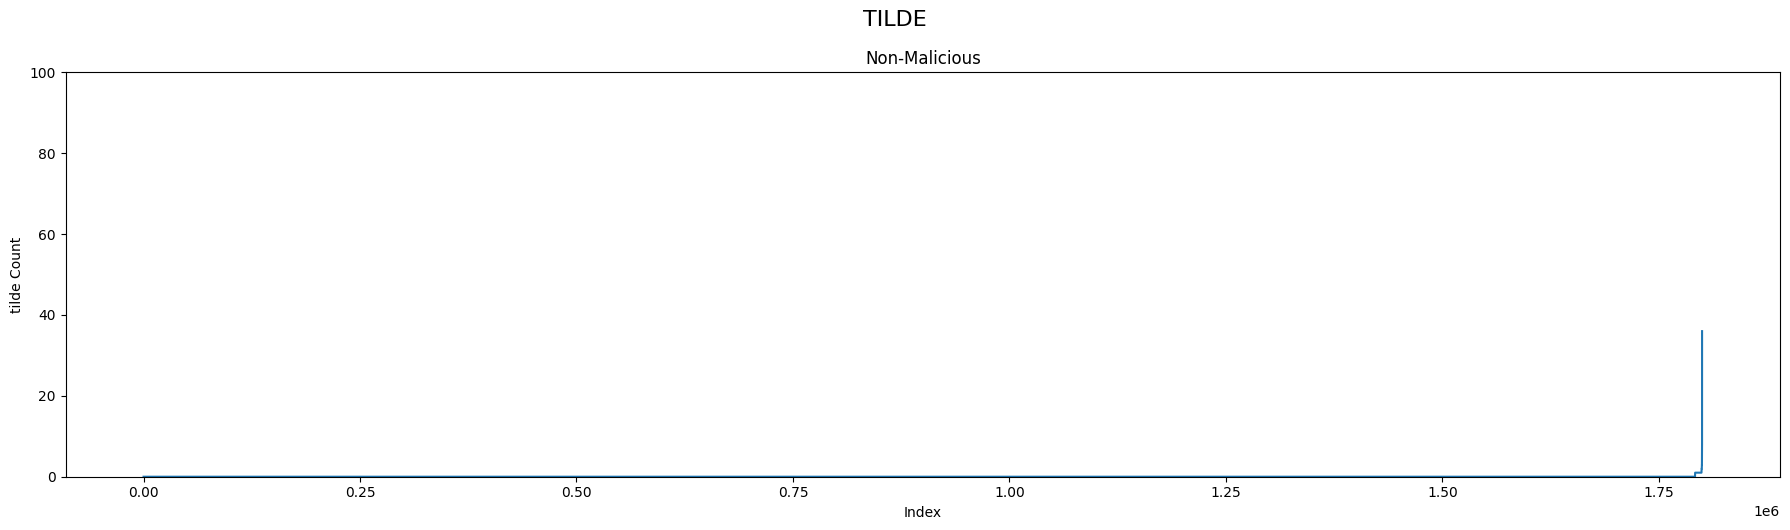

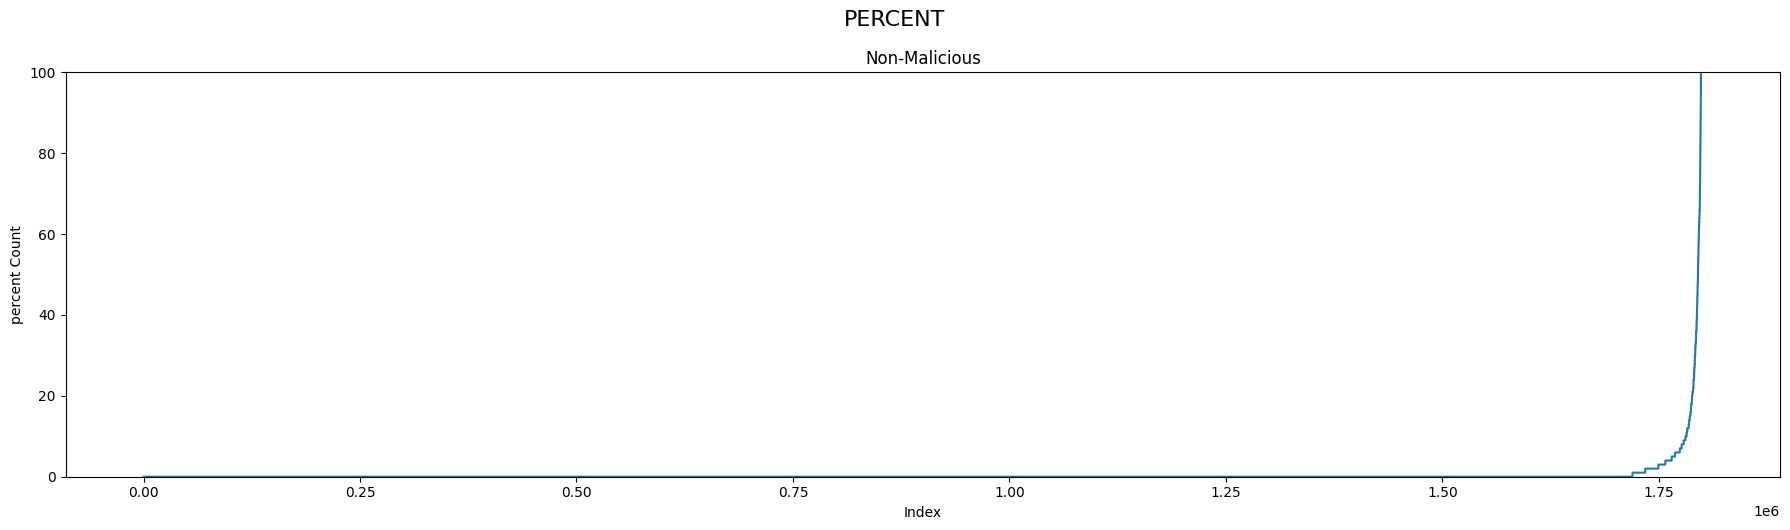

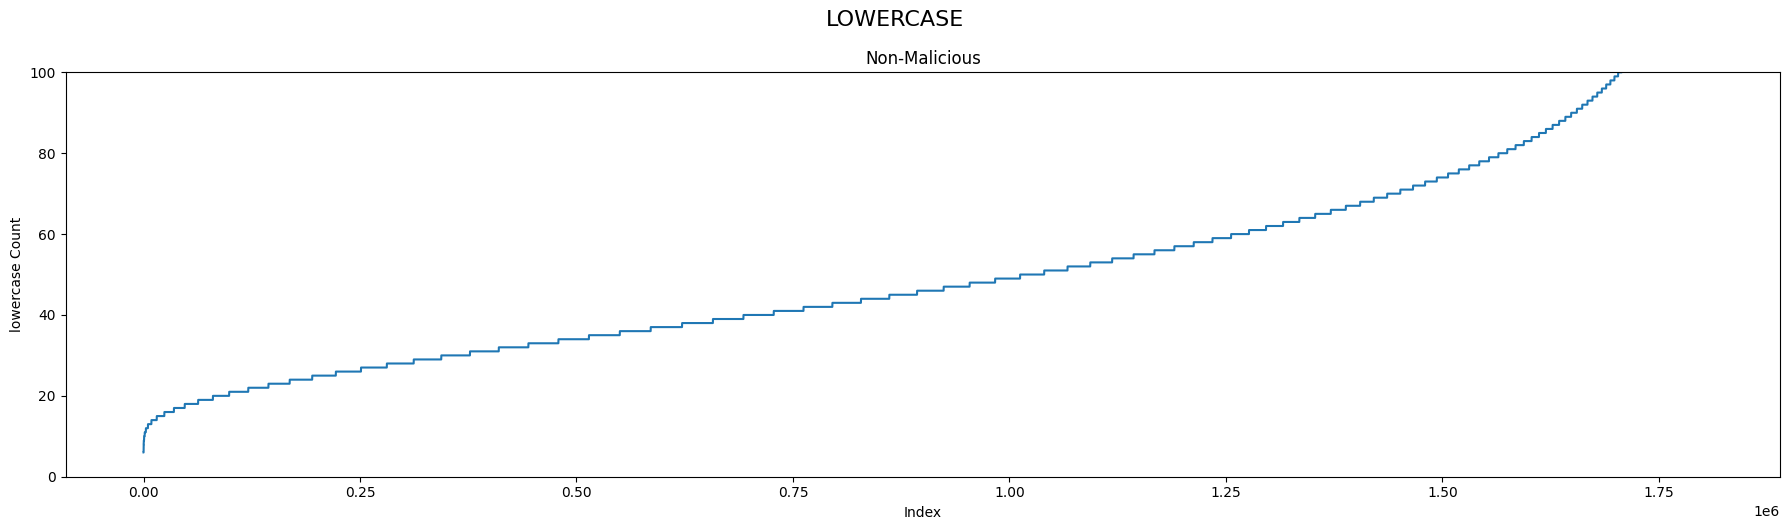

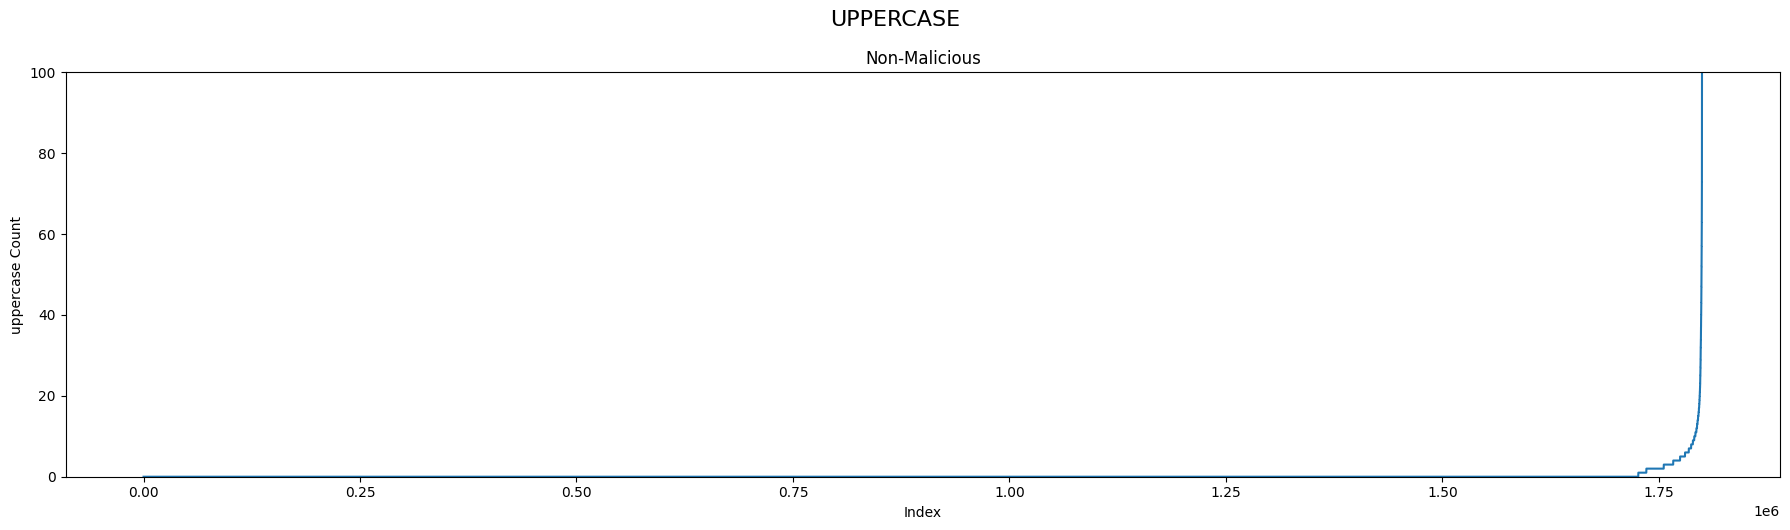

In [24]:
column_list = ["dots", "equals", "slashes", "at", "special_chars", "hyphens", "digits", "colons", "question_marks", "and", "underscore", "tilde", "percent", "lowercase", "uppercase"]

for i in column_list:
    line_plot(i)

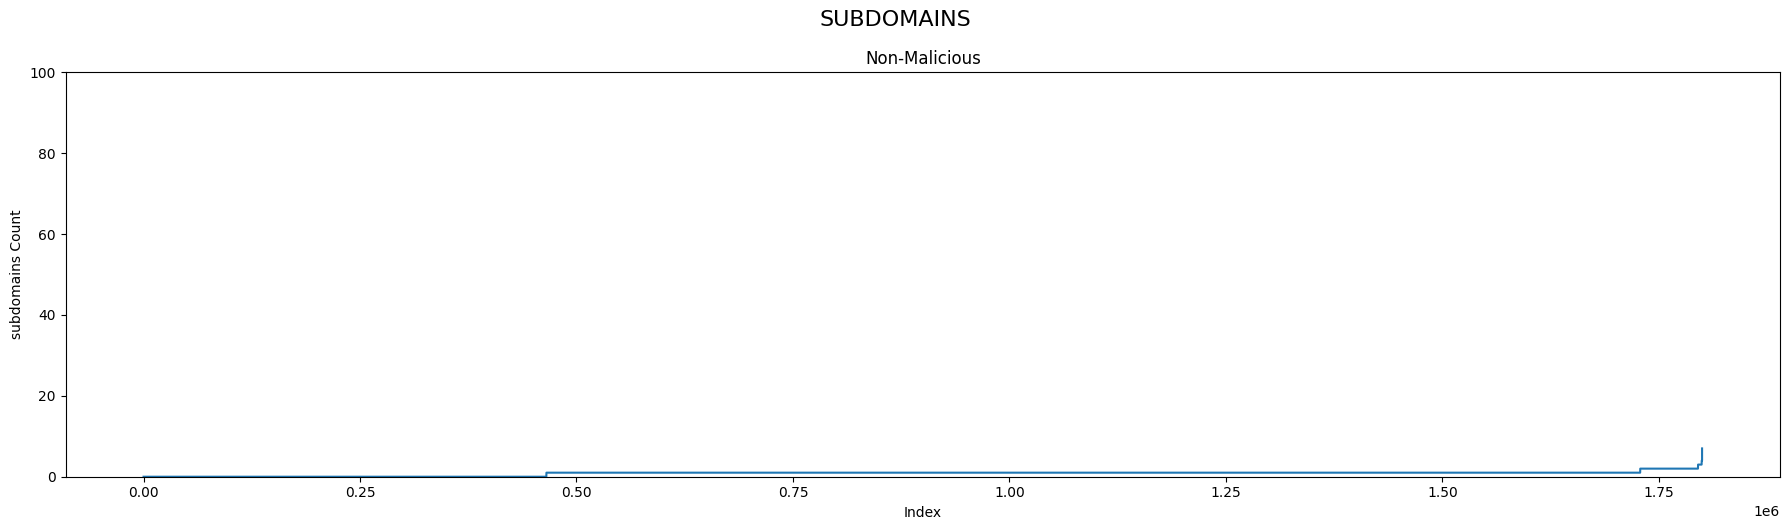

In [25]:
line_plot("subdomains")

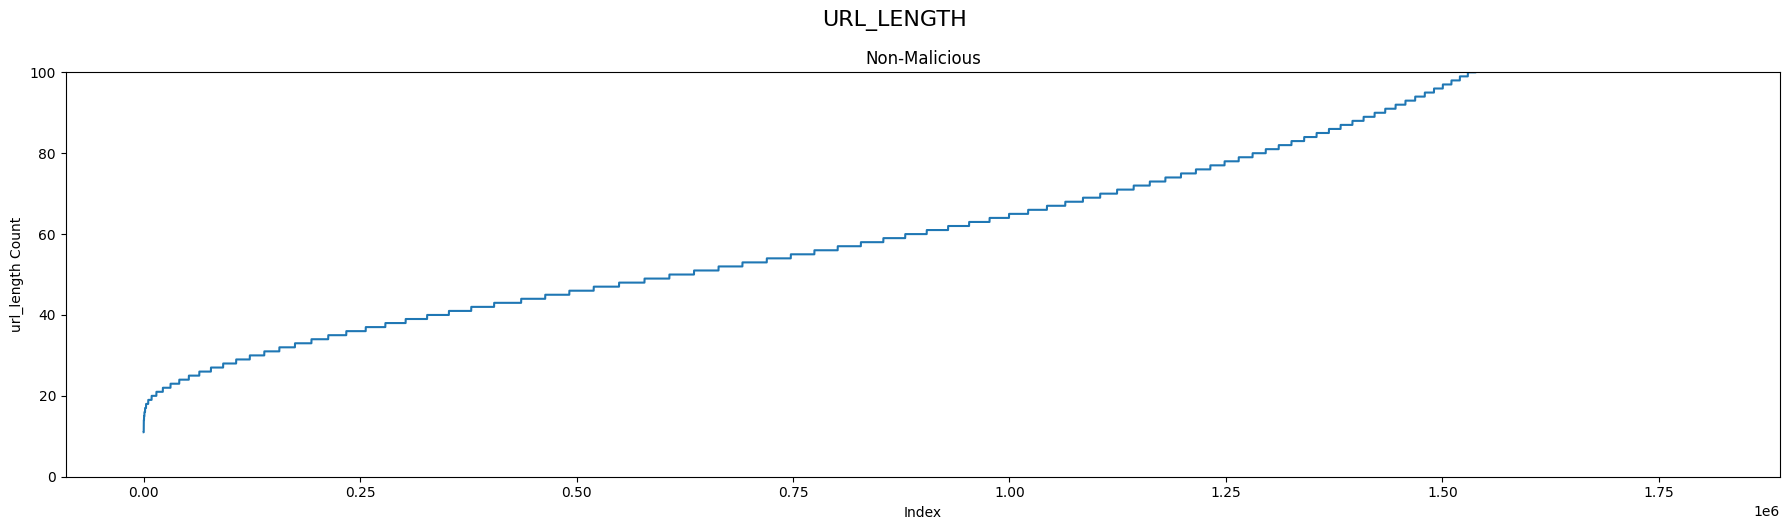

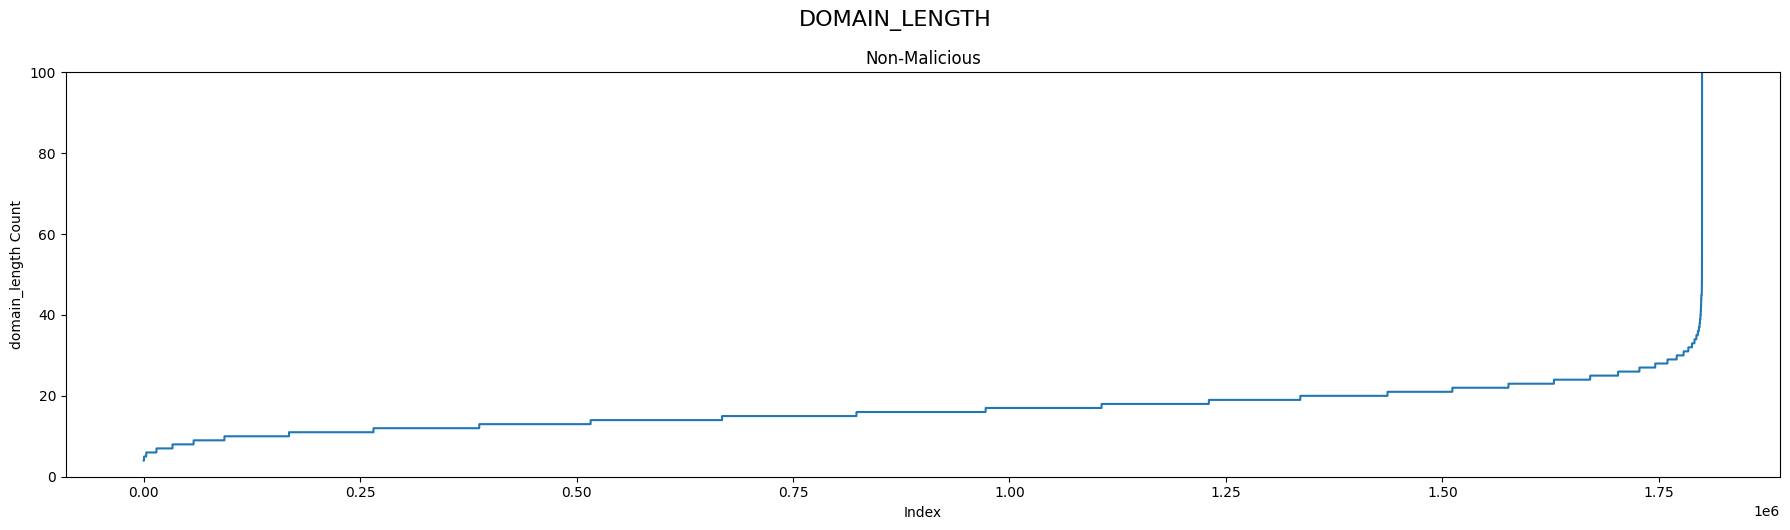

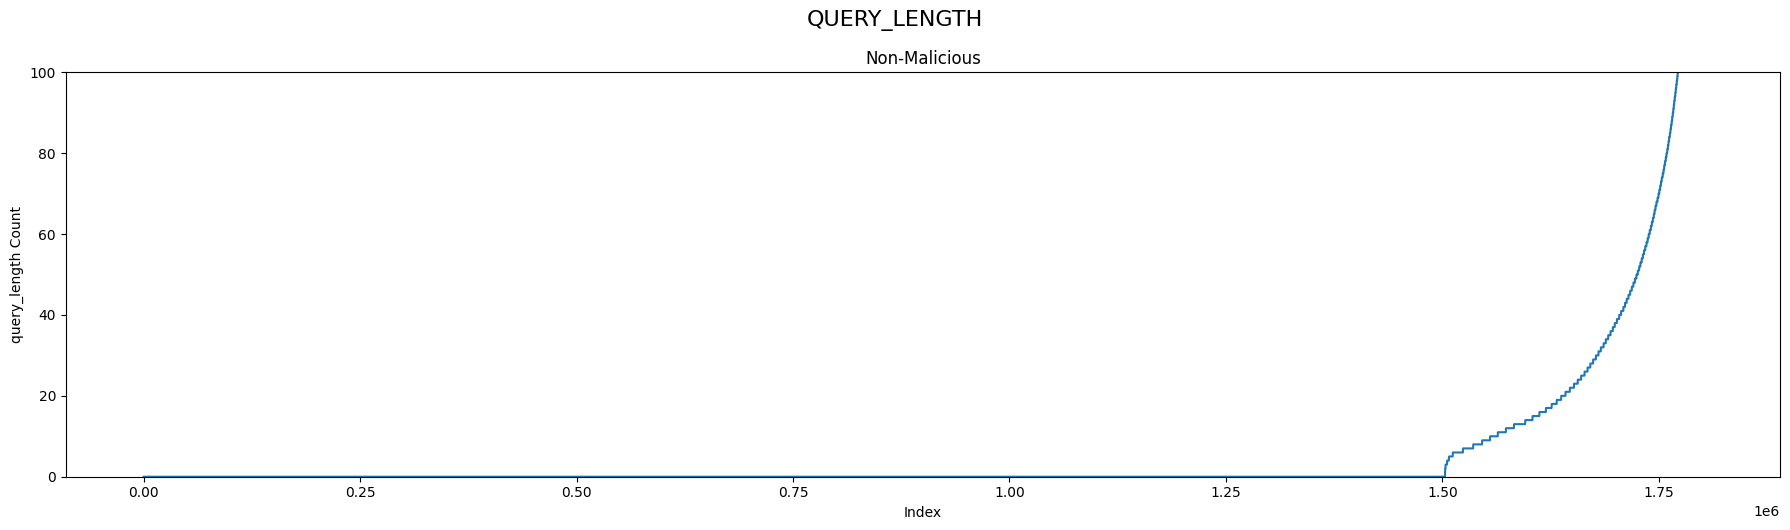

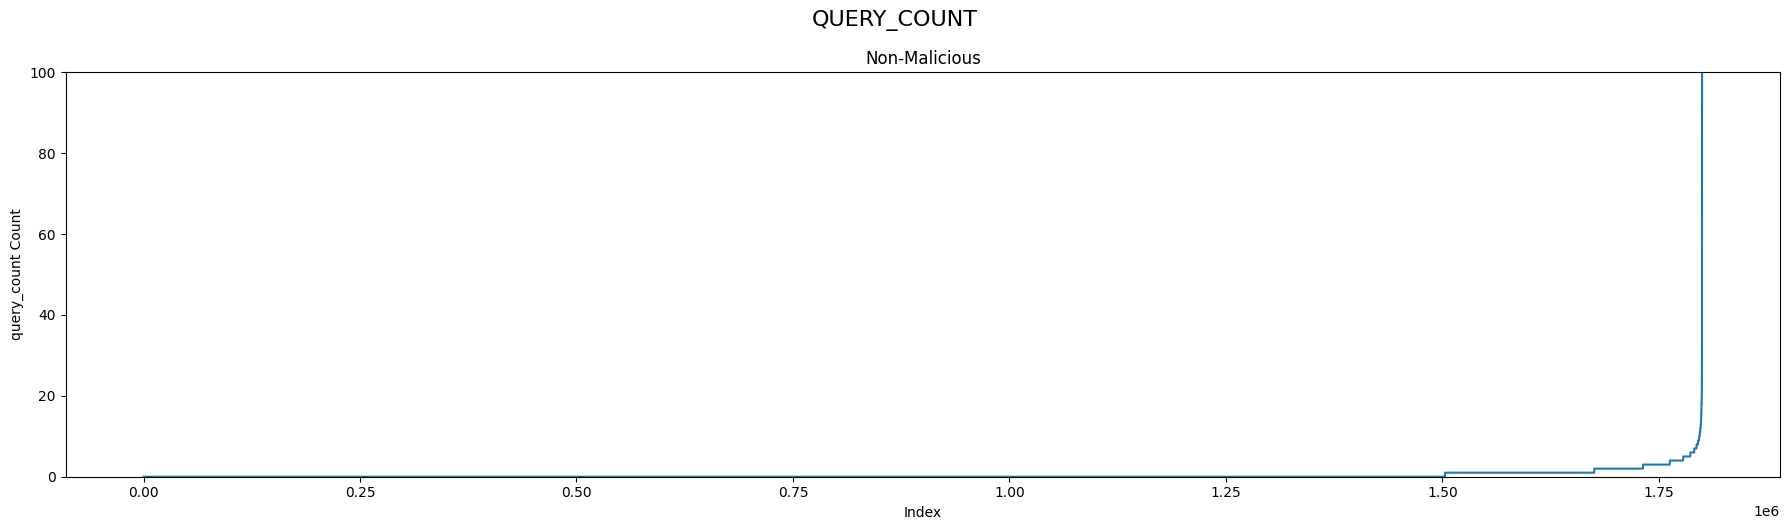

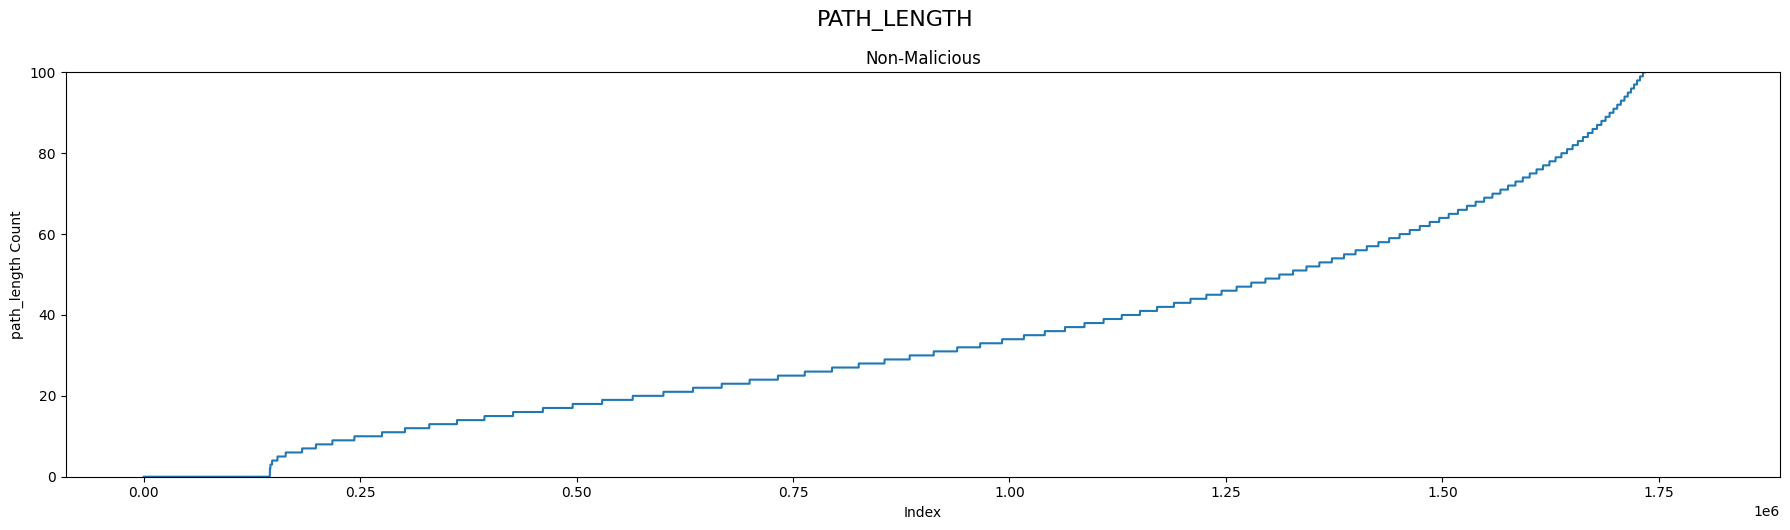

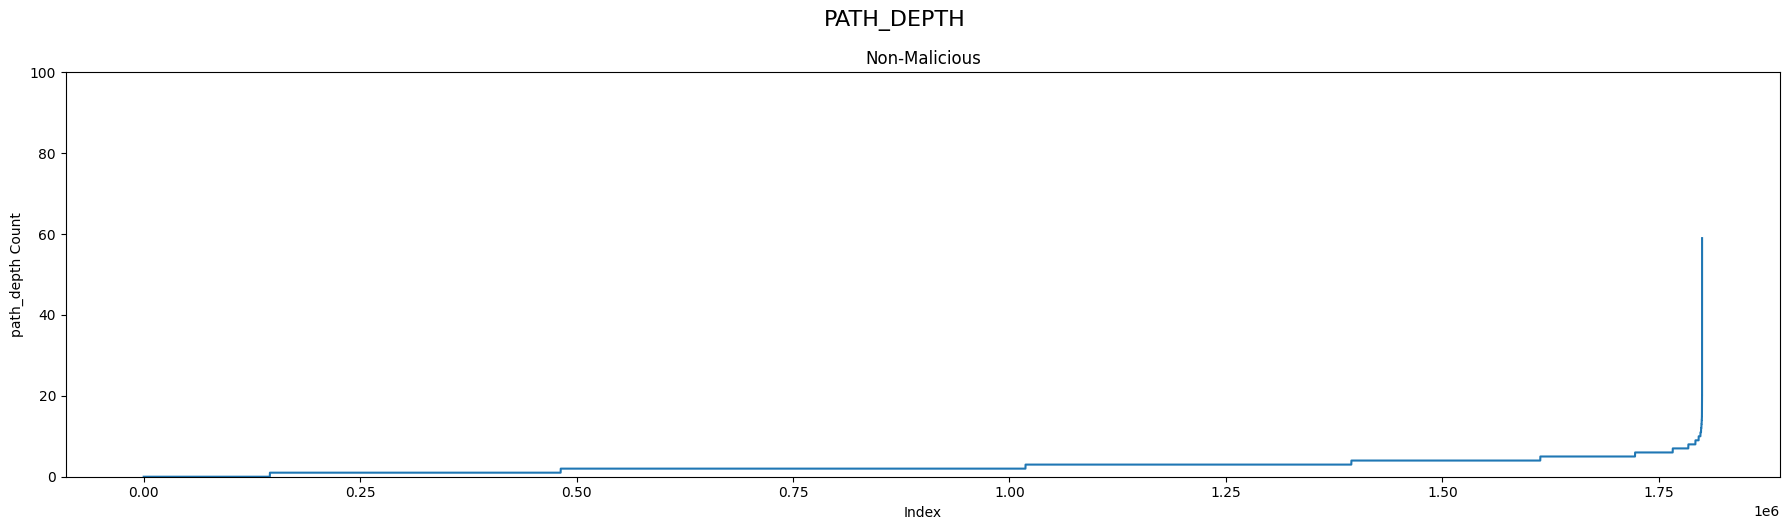

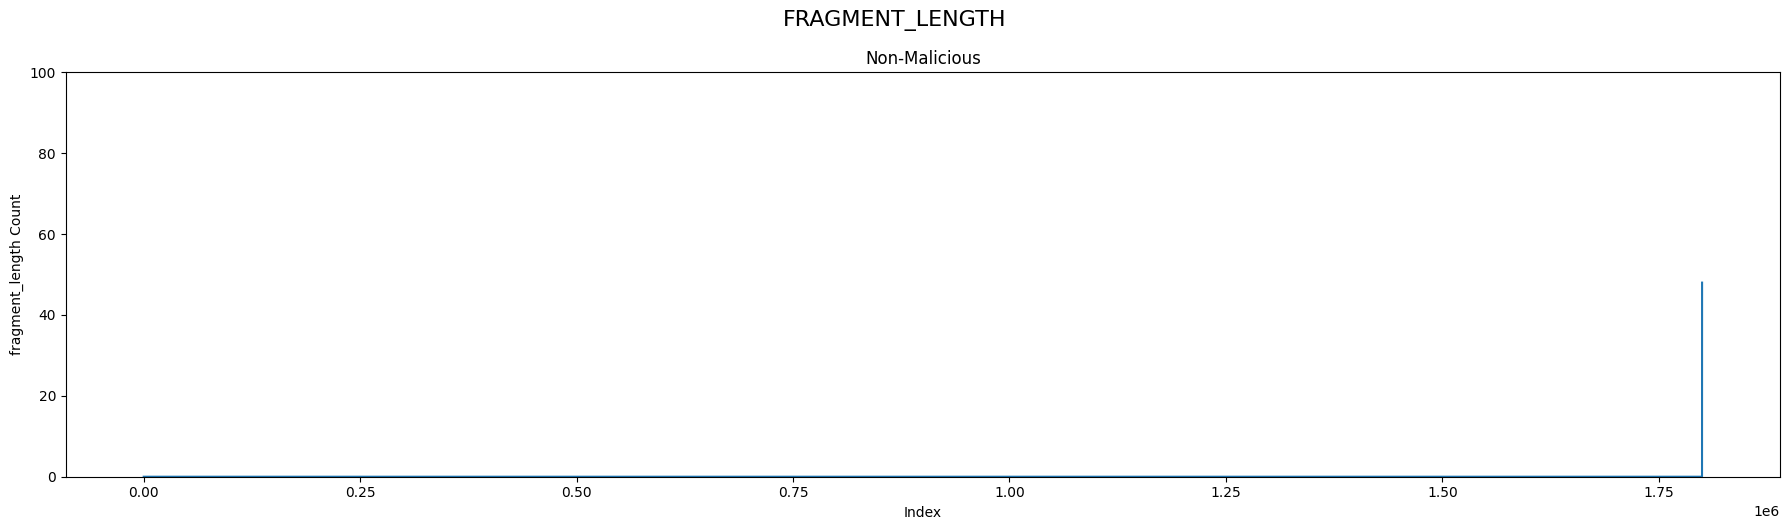

In [26]:
column_list = ["url_length", "domain_length", "query_length", "query_count", "path_length", "path_depth", "fragment_length"]

for i in column_list:
    line_plot(i)

In [27]:
def histogram_plot(column_name):
    fig, axes = plt.subplots(1, 1, figsize=(18, 5), sharey=True)

    axes.hist(cf1[column_name], bins=30, color='blue', alpha=0.7)
    axes.set_title("Non-Malicious")
    axes.set_xlabel(f"{column_name} Ratio")
    axes.set_ylabel("Frequency")
    axes.set_xlim(0, 1)

    plt.tight_layout()
    plt.suptitle(f"{column_name.upper()}", fontsize=16, y=1.05)
    plt.show()

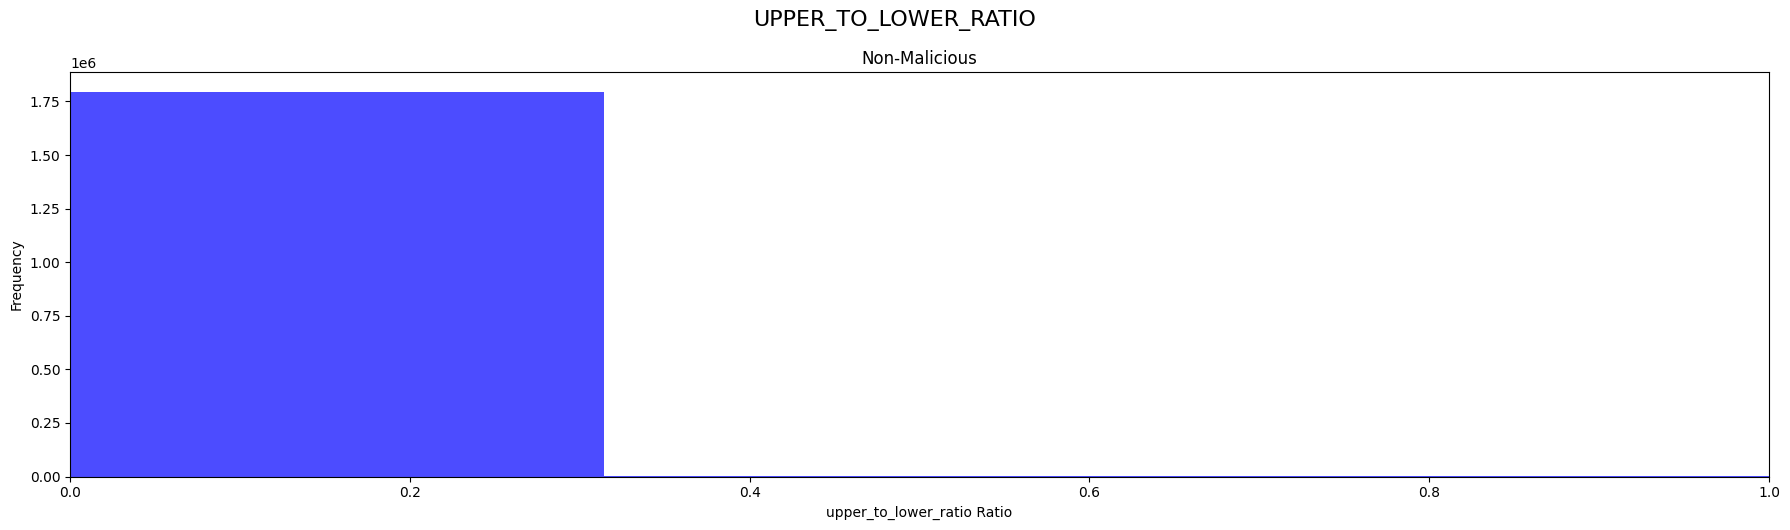

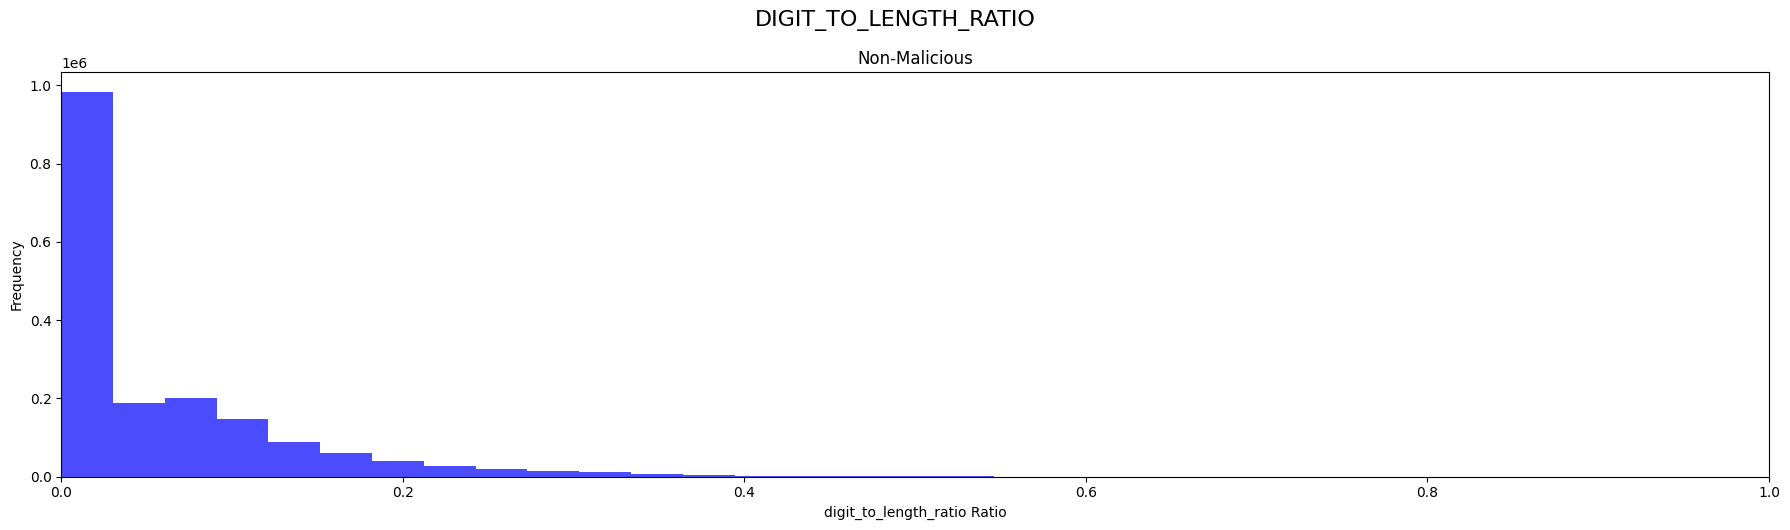

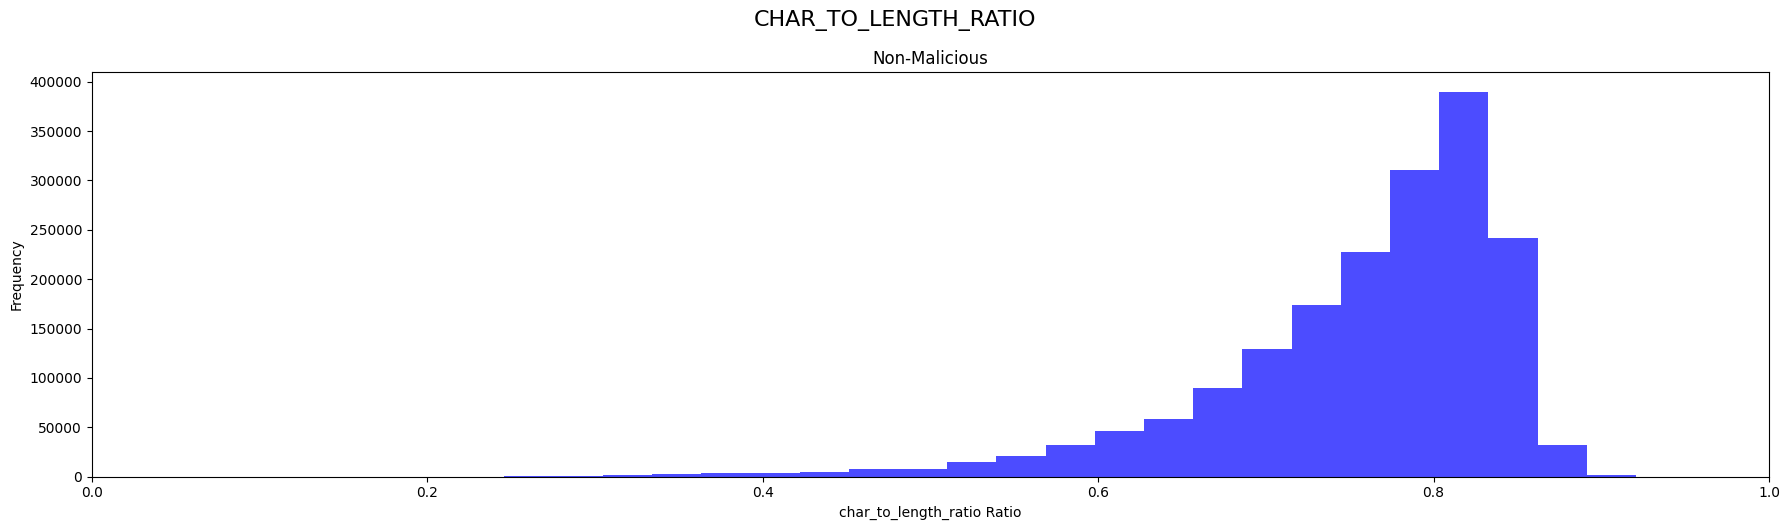

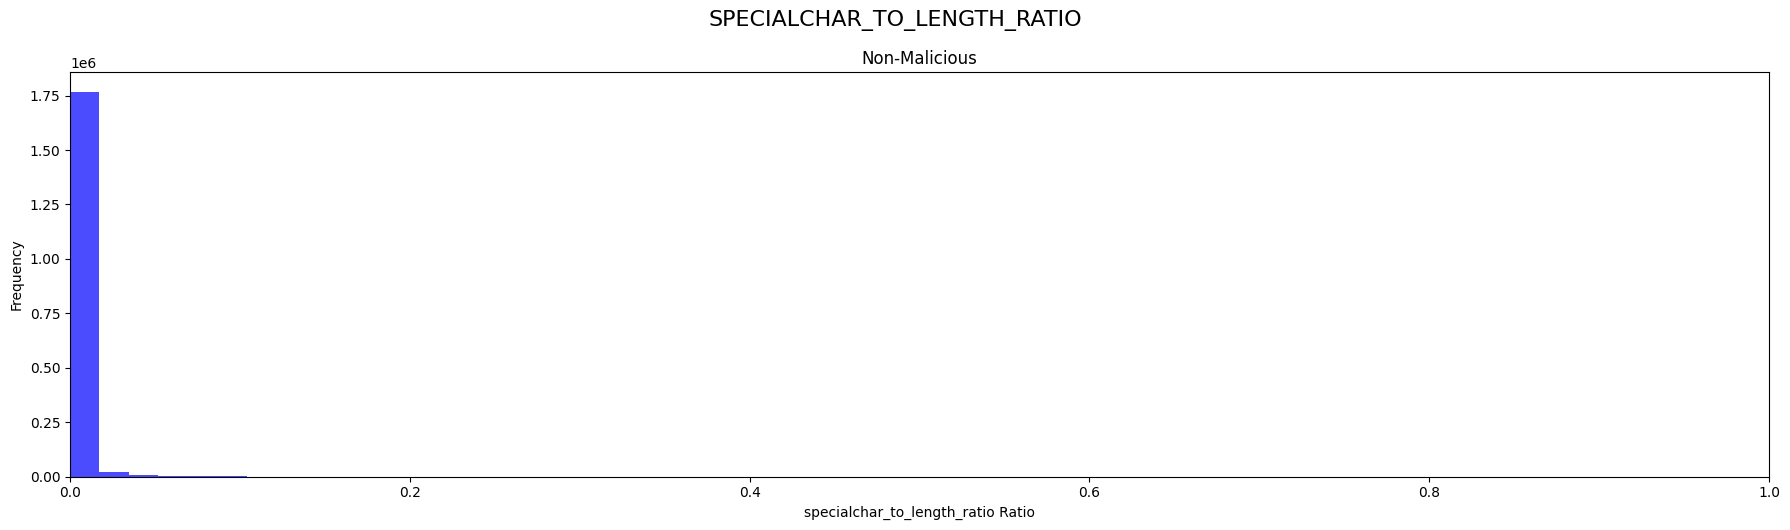

In [28]:
column_list = ["upper_to_lower_ratio", "digit_to_length_ratio", "char_to_length_ratio", "specialchar_to_length_ratio"]

for i in column_list:
    histogram_plot(i)

In [29]:
def pie_plot(column_list):
    for column_name in column_list:
        fig, ax = plt.subplots(figsize=(7, 6))

        counts = cf1[column_name].value_counts().sort_index()

        # Handle binary columns specially
        if set(counts.index) == {0, 1}:
            labels = ["No", "Yes"]
            colors = ["lightgreen", "lightcoral"]
        else:
            labels = [str(val) for val in counts.index]
            colors = None

        wedges, texts, autotexts = ax.pie(
            counts,
            labels=labels,
            autopct='%1.1f%%',
            colors=colors,
            startangle=90
        )

        for i, p in enumerate(wedges):
            ang = (p.theta2 - p.theta1)/2. + p.theta1
            y = np.sin(np.deg2rad(ang))
            x = np.cos(np.deg2rad(ang))
            ax.annotate(
                f"{counts.iloc[i]}",
                xy=(x, y),
                xytext=(1.25*x, 1.25*y),
                ha='center', va='center',
                fontsize=10, weight='bold',
                arrowprops=dict(arrowstyle="-", color="gray", lw=1)
            )

        ax.set_title(f"Pie Chart for {column_name}")
        plt.show()

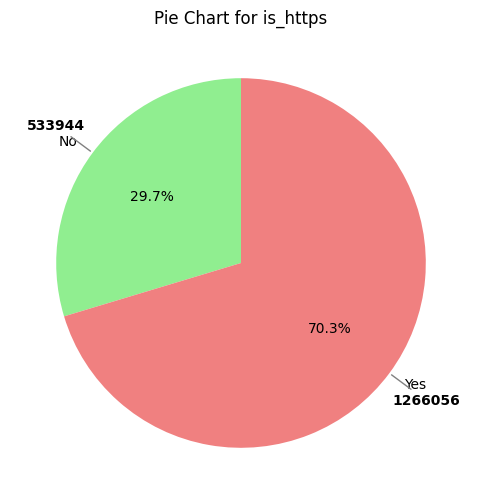

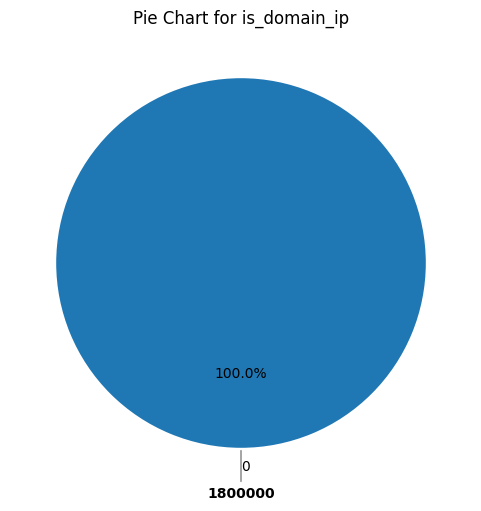

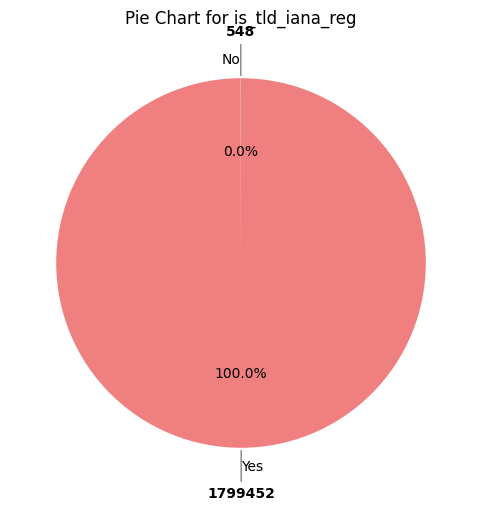

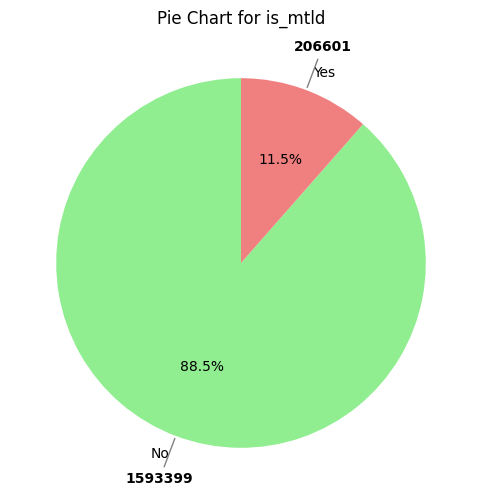

In [30]:
column_list = ["is_https", "is_domain_ip", "is_tld_iana_reg", "is_mtld"]
pie_plot(column_list)

In [31]:
def histogram_plot(columns):
    for col in columns:
        plt.figure(figsize=(12, 5))

        plt.hist(cf1[col], bins=30, alpha=0.6, label="Non-Malicious", color="lightgreen", density=True)

        plt.title(f"{col.upper()}")
        plt.xlabel(col)
        plt.ylabel("Density")
        plt.legend()
        plt.show()

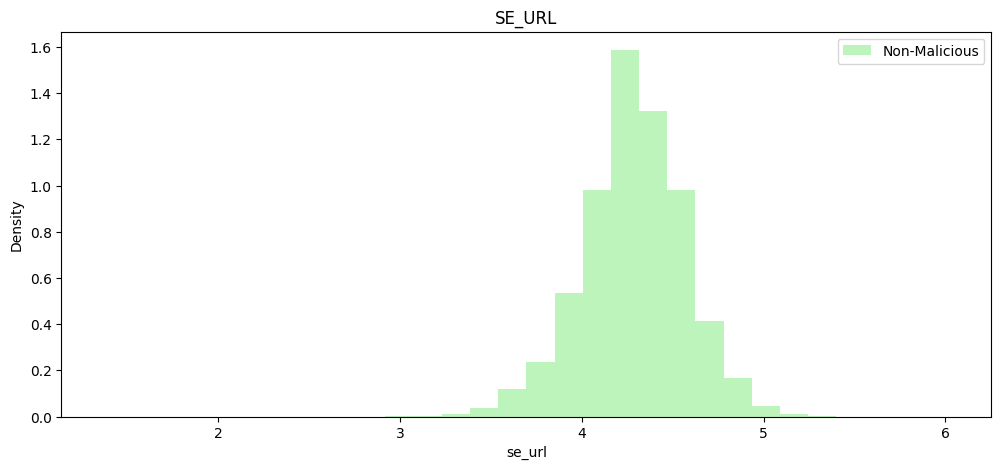

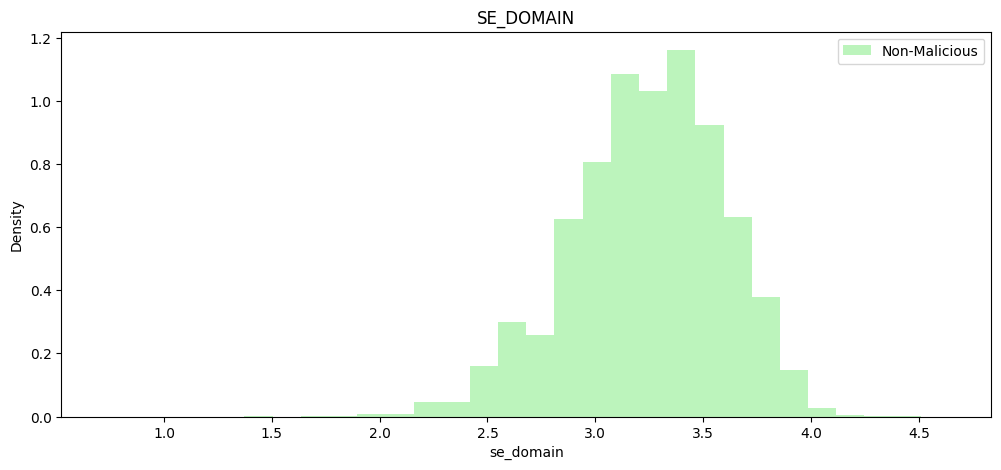

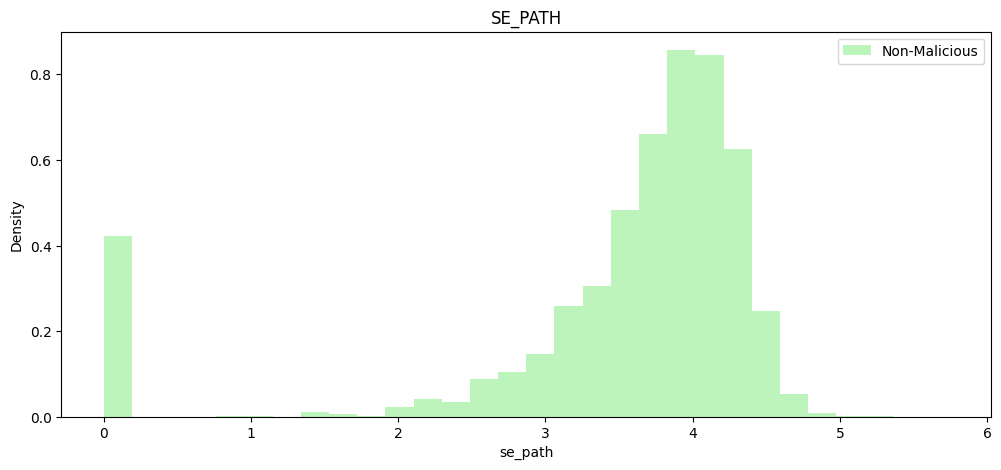

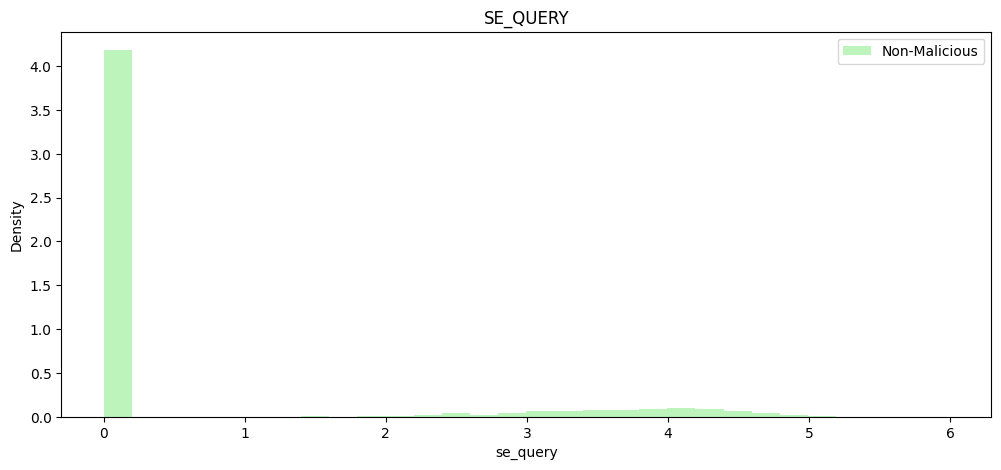

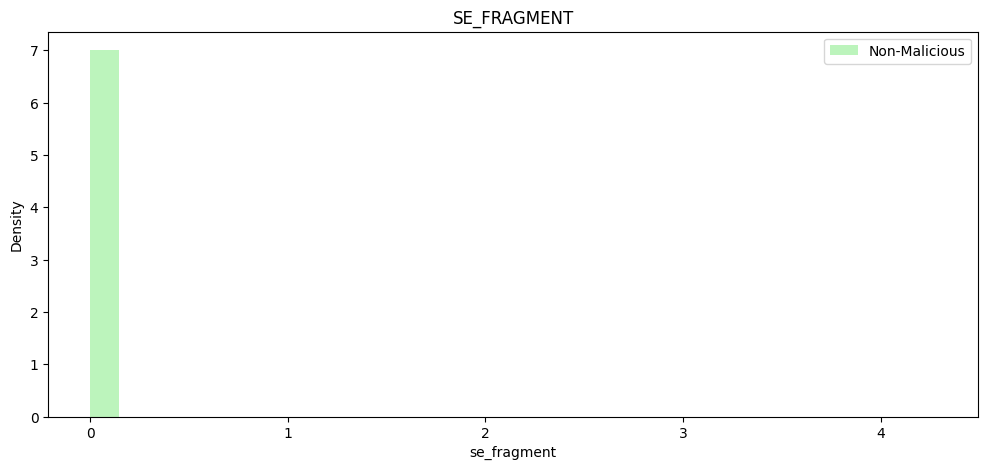

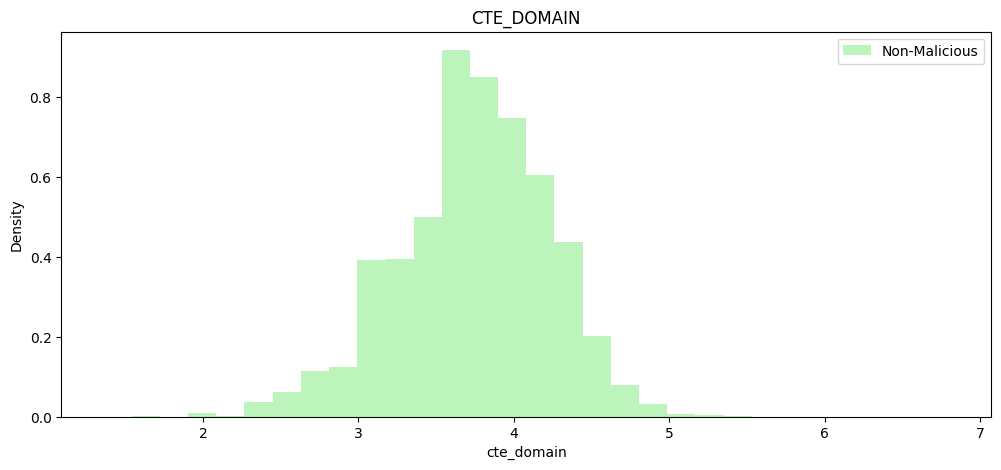

In [32]:
column_list = ['se_url', 'se_domain', 'se_path', 'se_query', 'se_fragment', 'cte_domain']
histogram_plot(column_list)

In [39]:
def box_plot(columns):
    for col in columns:
        plt.figure(figsize=(10, 4))
        plt.boxplot(cf1[col], tick_labels=[col])
        plt.title(f"{col.upper()}")
        plt.ylabel("Values")
        plt.grid(True, linestyle="--", alpha=0.6)
        plt.show()


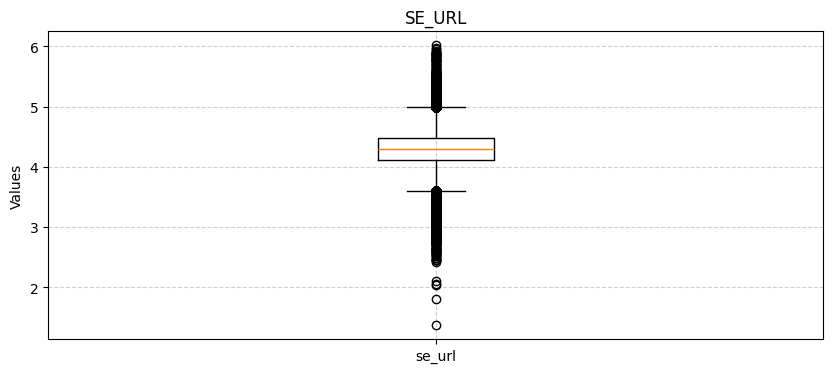

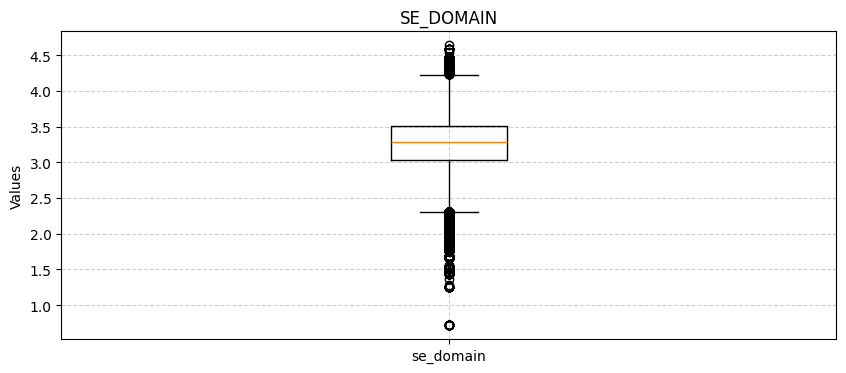

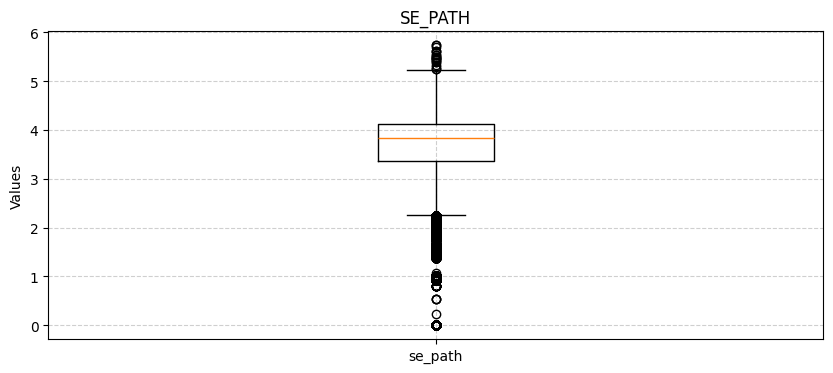

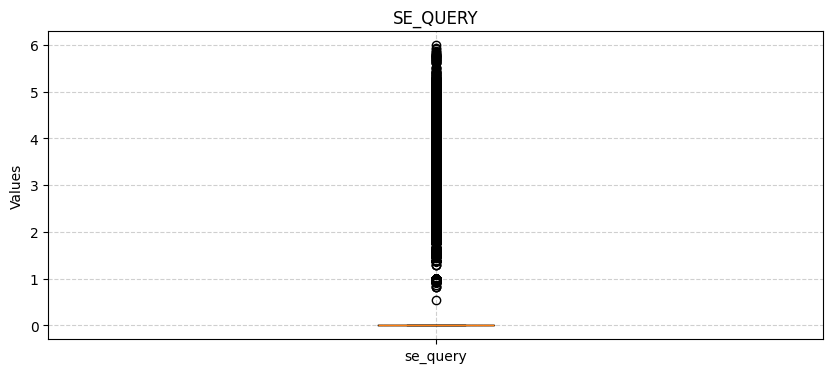

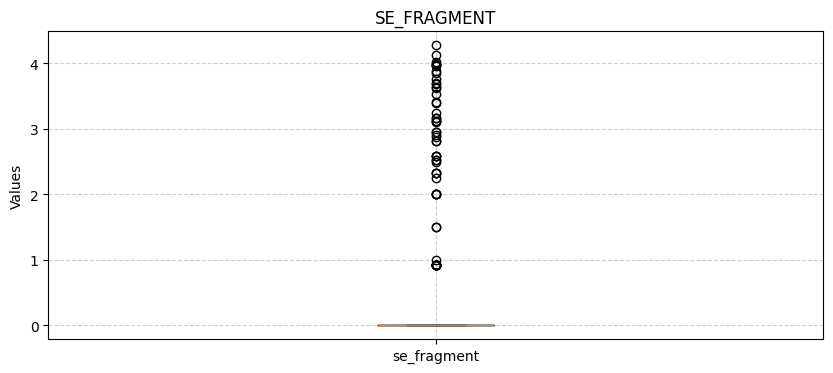

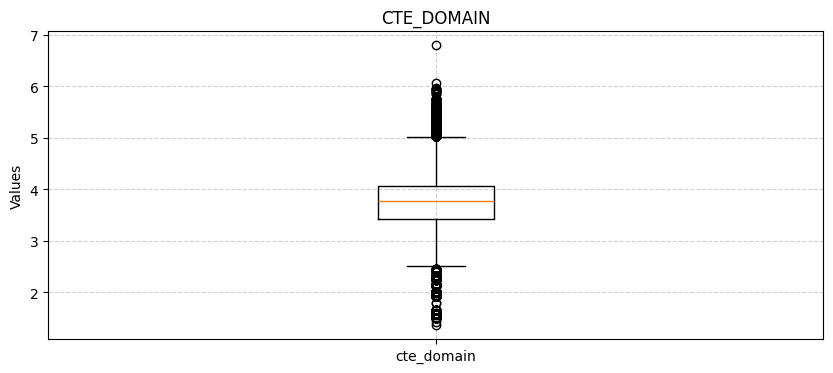

In [40]:
box_plot(column_list)